# Разведочный анализ данных(часть 1)
*Коптев Данил*

**Признаки, подлежащие исследованию:** LotFrontage, ScreenPorch, BsmtFullBath

**Подключение библиотек**

In [1348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import math

**Чтение файла**

In [1349]:
dataAll = pd.read_csv('house_prices.csv')

Выбираем нужные данные по заданию

1.   LotFrontage - линейные футы улицы, связанной с собственностью 
2.   ScreenPorch - площадь веранды в квадратных метрах
1.   BsmtFullBath - полноценные санузлы на цокольном этаже







In [1350]:
data = dataAll[['LotFrontage', 'ScreenPorch', 'BsmtFullBath']]

**Вывод описательных статистик для количественных переменных**

In [1351]:
data.describe()

,LotFrontage,ScreenPorch,BsmtFullBath
count,1201.000000,1460.000000,1460.000000
mean,70.049958,15.060959,0.425342
std,24.284752,55.757415,0.518911
min,21.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000
50%,69.000000,0.000000,0.000000
75%,80.000000,0.000000,1.000000
max,313.000000,480.000000,3.000000


**Вывод значений выборочного коэффициента асимметрии для количественных переменных**

In [1352]:
data.skew()

LotFrontage     2.163569
ScreenPorch     4.122214
BsmtFullBath    0.596067
dtype: float64

**LotFrontage = 2.163569**, следовательно большая часть значений переменной сгруппирована у левого хвоста распределения, а правый хвост длиннее ("тяжелый" левый хвост)


**ScreenPorch = 4.122214**, следовательно большая часть значений переменной сгруппирована у левого хвоста распределения, а правый хвост длиннее ("тяжелый" левый хвост)

**BsmtFullBath = 0.596067**, следовательно большая часть значений переменной сгруппирована у левого хвоста распределения, а правый хвост длиннее ("тяжелый" левый хвост)


**Справочная информация**
* *у симметричного распределения коэффициент асимметрии равен 0*
* *положительный коэффициент ассиметрии означает, что большая часть значений переменной сгруппирована у левого хвоста распределения, а правый хвост длиннее ("тяжелый" левый хвост)*
* *отрицательный коэффициент ассиметрии означает, что большая часть значений сгруппирована у правого хвоста, а левый хвост длиннее ("тяжелый" правый хвост)*

**Вывод значений выборочного коэффициента эксцесса для количественных переменных**

In [1353]:
data.kurtosis()

LotFrontage     17.452867
ScreenPorch     18.439068
BsmtFullBath    -0.839098
dtype: float64

**LotFrontage = 17.452867**, следовательно форма распределения становится более острой, а его хвосты – длиннее ("тяжелее"), поскольку большая доля значений переменной располагается в хвостах распределения


**ScreenPorch = 18.439068**, следовательно форма распределения становится более острой, а его хвосты – длиннее ("тяжелее"), поскольку большая доля значений переменной располагается в хвостах распределения


**BsmtFullBath = -0.839098**, следовательно форма распределения становится более плоской, а его хвосты – короче ("легче"), поскольку меньшее число значений располагается в хвостах


**Спавочная информация**
*  *у нормального распределения коэффициент эксцесса равен 0*
*  *положительный коэффициент эксцесса (островершинные распределения, leptokurtic) означает, что форма распределения становится более острой, а его хвосты – длиннее ("тяжелее"), поскольку большая доля значений переменной располагается в хвостах распределения*
* *отрицательный коэффициент эксцесса (плосковершинные распределения, platykurtic) означает, что форма распределения становится более плоской, а его хвосты – короче ("легче"), поскольку меньшее число значений располагается в хвостах*

**Визуализирую распределения**

Text(0.5, 0, 'BsmtFullBath')

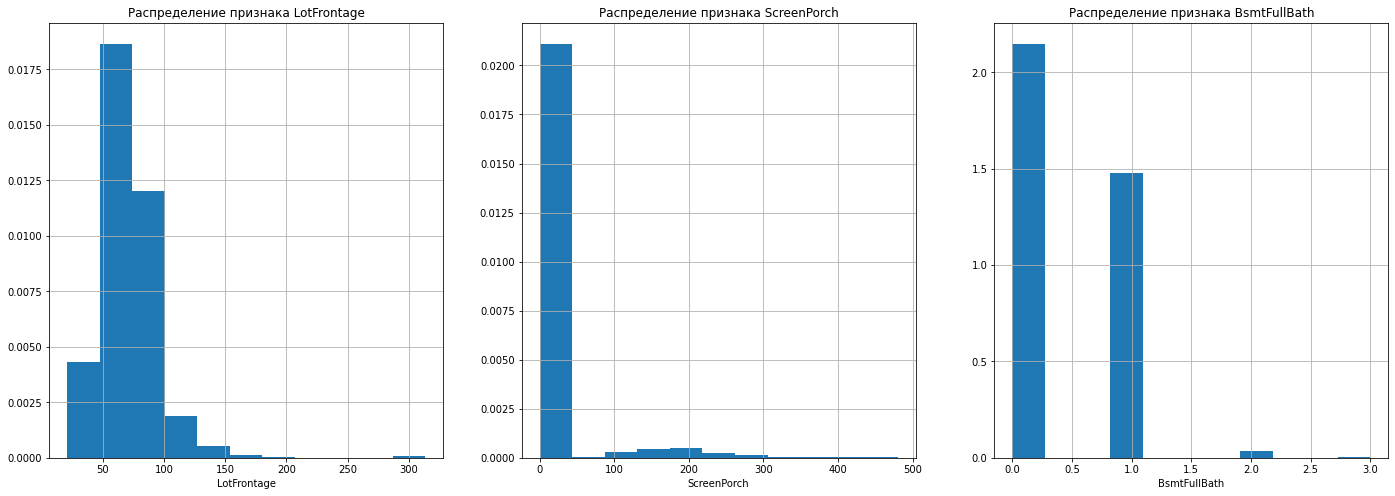

In [1354]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)

data['LotFrontage'].hist(bins=int(1+np.floor(np.log2(data['LotFrontage'].count()))), density=True)
plt.title('Распределение признака LotFrontage')
plt.xlabel('LotFrontage')

plt.subplot(1,3,2)
data['ScreenPorch'].hist(bins=int(1+np.floor(np.log2(data['ScreenPorch'].count()))), density=True)
plt.title('Распределение признака ScreenPorch')
plt.xlabel('ScreenPorch')

plt.subplot(1,3,3)
data['BsmtFullBath'].hist(bins=int(1+np.floor(np.log2(data['BsmtFullBath'].count()))), density=True)
plt.title('Распределение признака BsmtFullBath')
plt.xlabel('BsmtFullBath')

*На основание полученных описательных статистик, эксцесса и симметрии мы наглядно видим данные значения на графиках выше*

На графике параметра **BsmtFullBath** отражены дискретные значения 0, 1, 2 и 3

На графике параметра **ScreenPorch** существует выброс значения 0, так как данный параметр отвечает за площадь веранды в квадратных метрах, а значение ноль говорит о их отсутсвие, следоватеноль существует необходимость устранить данной вброс

Так же выборочный коэффициент эксцесса у параметра **ScreenPorch** больше 0 означает, что в данных много выбросов

**Убираем вброс в параметре ScreenPorch**

In [1355]:
data['ScreenPorch'] = data['ScreenPorch'][data['ScreenPorch']!=0]

<ipython-input-1355-c64a7275805c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ScreenPorch'] = data['ScreenPorch'][data['ScreenPorch']!=0]


**Вывод описательных статистик для переменного ScreenPorch**

In [1356]:
data['ScreenPorch'].describe()

count    116.000000
mean     189.560345
std       77.952191
min       40.000000
25%      143.750000
50%      180.000000
75%      224.000000
max      480.000000
Name: ScreenPorch, dtype: float64

**Вывод значения выборочного коэффициента асимметрии для переменного ScreenPorch**

In [1357]:
data['ScreenPorch'].skew()

1.186468489847003

**ScreenPorch = 1.18646**, следовательно большая часть значений переменной сгруппирована у левого хвоста распределения, а правый хвост длиннее ("тяжелый" левый хвост)

**Вывод значения выборочного коэффициента эксцесса для переменного ScreenPorch**

In [1358]:
data['ScreenPorch'].kurtosis()

2.2641877501057635

**ScreenPorch = 2.26418**, следовательно форма распределения становится более острой, а его хвосты – длиннее ("тяжелее"), поскольку большая доля значений переменной располагается в хвостах распределения

**2.26418 ближе к 0**, следовательно вероятность, что распределение ближе к нормальному распределению

**Визуализируем обновленный параметр ScreenPorch**

Text(0.5, 0, 'ScreenPorch')

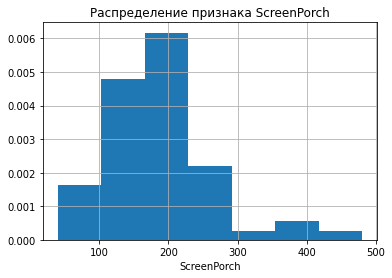

In [1359]:
k = int(1+np.floor(np.log2(data['ScreenPorch'].count())))
data['ScreenPorch'].hist(bins= k , density=True)
plt.title('Распределение признака ScreenPorch')
plt.xlabel('ScreenPorch')

*На основание полученных выводов по описательным статистикам, эксцесса и симметрии мы наглядно видим данные выводы на графике выше*

**Сформулируем  предположение  о  нормальности/отличии  от  нормального распределения для каждого признака**

Отобразим нормальное рапределение на графиках параметров

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


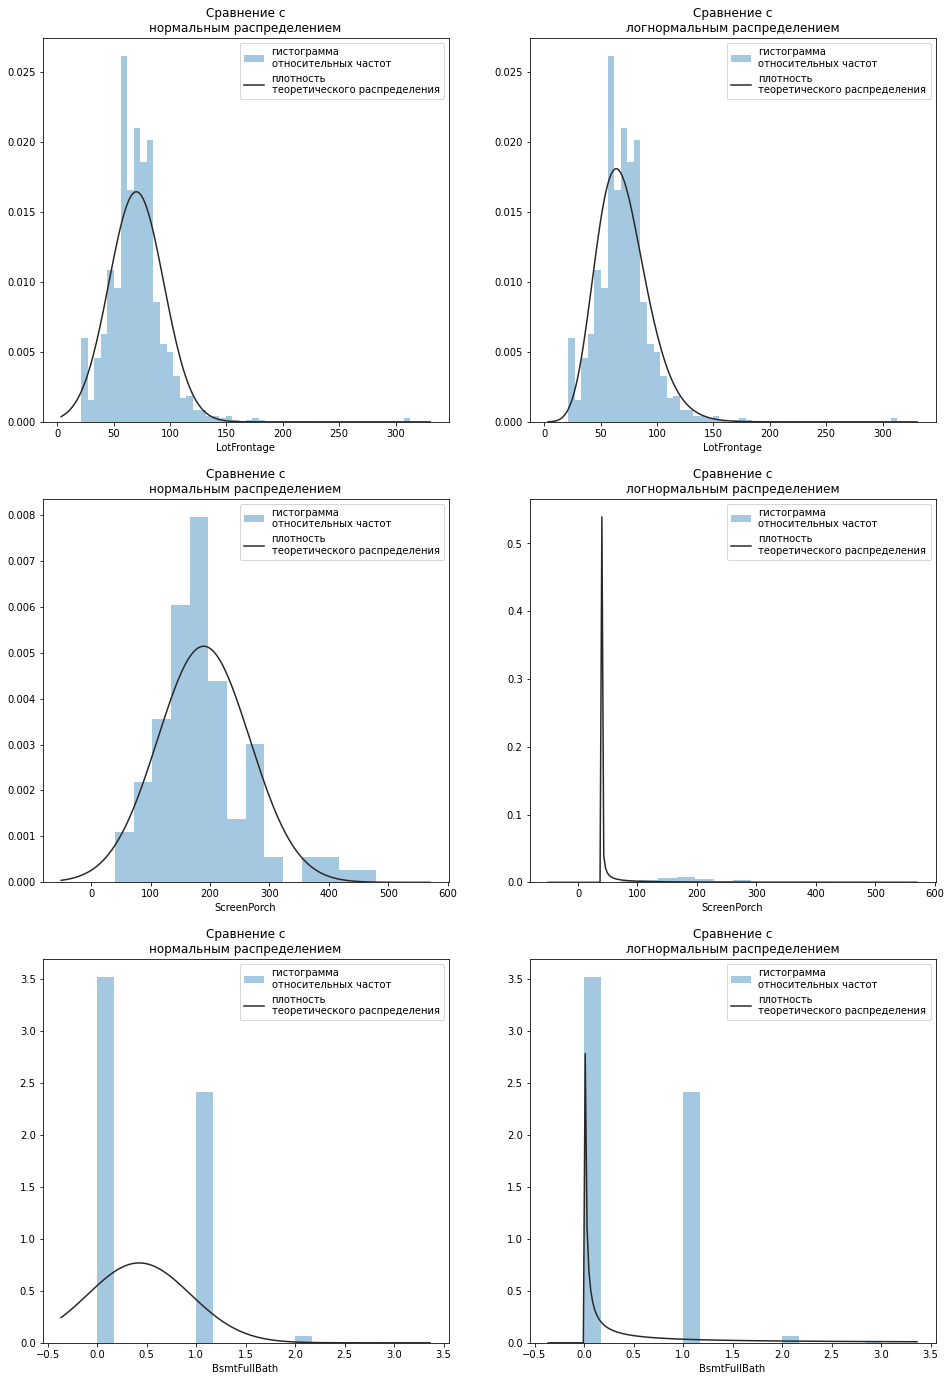

In [1360]:
plt.figure(figsize=(16,24))

plt.subplot(3,2,1)
sns.distplot(data['LotFrontage'], kde=False, fit=sts.norm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение с\nнормальным распределением')
plt.legend()
plt.subplot(3,2,2)
sns.distplot(data['LotFrontage'], kde=False, fit=sts.lognorm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение с\nлогнормальным распределением')
plt.legend()

plt.subplot(3,2,3)
sns.distplot(data['ScreenPorch'], kde=False, fit=sts.norm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение с\nнормальным распределением')
plt.legend()
plt.subplot(3,2,4)
sns.distplot(data['ScreenPorch'], kde=False, fit=sts.lognorm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение с\nлогнормальным распределением')
plt.legend()


plt.subplot(3,2,5)
sns.distplot(data['BsmtFullBath'], kde=False, fit=sts.norm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение с\nнормальным распределением')
plt.legend()
plt.subplot(3,2,6)
sns.distplot(data['BsmtFullBath'], kde=False, fit=sts.lognorm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение с\nлогнормальным распределением')
plt.legend()

Параметр **LotFrontage** судя по графикам сравним с логнормальным распределением

Параметр **ScreenPorch** судя по графикам сравним с нормальным распределением

Параметр **BsmtFullBath** судля по графикам не сравним ни с логнормальным, ни с нормальным распределением. Можно предположить о распределение Пауссона.

**Выполним проверку статистической гипотезы о нормальности распределения параметра ScreenPorch**

Используем критерий Пирсона

In [1361]:
x = data['ScreenPorch'].dropna();
k = 1 + int(math.log2(x.count()))
ni, xi = np.histogram(data['ScreenPorch'].dropna(), bins = k)
n = sum(ni)
h = xi[1] - xi[0]
x_mid = np.array([(xi[i] + xi[i + 1])/2 for i in range(k)])
m = sum(x_mid * ni) / n
D_v = sum(x_mid ** 2 * ni) / n - m ** 2 
sigma = D_v ** 0.5 
print(sigma, m)

76.51530855585891 186.84729064039408


In [1362]:
rv = sts.norm(m, sigma)

In [1363]:
ni

array([12, 35, 45, 16,  2,  4,  2])

In [1364]:
n_th = [n * (rv.cdf(xi[i + 1]) - rv.cdf(xi[i])) for i in range(k)]
n_th

[12.60798456796561,
 29.583489702246705,
 36.65925630879893,
 24.003693683554776,
 8.296295497858607,
 1.5099465089811681,
 0.14423153376459563]

In [1365]:
ni[4] += ni[5] + ni[6]
ni = ni[:5]
print(ni)

n_th[4] += n_th[5] + n_th[6]
n_th = n_th[:5]
print(n_th)

[12 35 45 16  8]
[12.60798456796561, 29.583489702246705, 36.65925630879893, 24.003693683554776, 9.95047354060437]


In [1366]:
a = 0.05
chi2_emp = sum((ni - n_th) ** 2 / n_th)
print(chi2_emp)
chi2_kr = sts.chi2.ppf(1 - a, 5 - 1 - 2)
print(chi2_kr)

5.96977984547122
5.991464547107979


$H_0$: распределение генеральной совокупности не отличается от нормального распределения с $m = 76.51530855585891$ и $σ = 186.84729064039408$

$H_1$: распределение генеральной совокупности отличается от нормального распределения с $m = 76.51530855585891$ и $σ = 186.84729064039408$

$\chi^2_{набл} < \chi^2_{кр}$ следовательно $H_0$ принимаем

Вывод: не обнаружены статистически значимые различия между распределения генеральной совокупности и с нормальным распределенияем  с $m = 76.51530855585891$ и $σ = 186.84729064039408$

**Выполним проверку статистической гипотезы о логнормальном распределении параметра LotFrontage**

Зная, что СВ Х имеет логнормальное распределение, если СВ  ln X имеет нормальное распределение, сделаем проверку статистической гипотезы о логнормальном распределение по критерию Пирсона

In [1367]:
x = np.log(data['LotFrontage'].dropna())
k = 1 + int(math.log2(x.count()))
ni, xi = np.histogram(x, bins = k)
n = sum(ni)
h = xi[1] - xi[0]
x_mid = np.array([(xi[i] + xi[i + 1])/2 for i in range(k)])
m = sum(x_mid * ni) / n
D_v = sum(x_mid ** 2 * ni) / n - m ** 2 
sigma = D_v ** 0.5 
print(sigma, m)

0.3531383420861697 4.195768505241536


In [1368]:
rv = sts.norm(m, sigma)

In [1369]:
ni

array([ 42,  22,  56, 152, 411, 366, 113,  29,   8,   0,   2])

In [1370]:
n_th = [n * (rv.cdf(xi[i + 1]) - rv.cdf(xi[i])) for i in range(k)]
n_th

[5.534929230920656,
 30.796897687570034,
 107.46571527631923,
 235.41991532569108,
 323.98601790605755,
 280.18595232105986,
 152.24576214643972,
 51.949957180473206,
 11.121753807043307,
 1.4920997167706174,
 0.12527695639477765]

In [1371]:
ni[8] += ni[9] + ni[10]
ni = ni[:9]
print(ni)

n_th[8] += n_th[9] + n_th[10]
n_th = n_th[:9]
print(n_th)

[ 42  22  56 152 411 366 113  29  10]
[5.534929230920656, 30.796897687570034, 107.46571527631923, 235.41991532569108, 323.98601790605755, 280.18595232105986, 152.24576214643972, 51.949957180473206, 12.739130480208702]


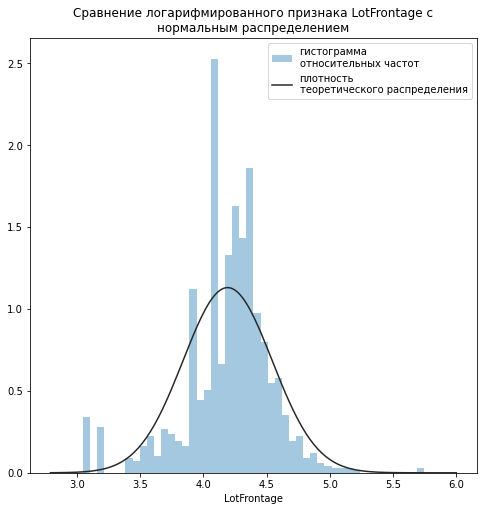

In [1372]:
plt.figure(figsize=(8,8))
sns.distplot(np.log(data['LotFrontage']), kde=False, fit=sts.norm, hist_kws={'label':'гистограмма\nотносительных частот'}, fit_kws={'label':'плотность\nтеоретического распределения'})
plt.title('Сравнение логарифмированного признака LotFrontage с\nнормальным распределением')
plt.legend()

In [1373]:
a = 0.05
chi2_emp = sum((ni - n_th) ** 2 / n_th)
print(chi2_emp)
chi2_kr = sts.chi2.ppf(1 - a, 9 - 1 - 2)
print(chi2_kr)

367.45418126117676
12.591587243743977


Условимся, что мы учли СВ X параметра LotFrontage имеет логнормальное распределение, если СВ  ln X имеет нормальное распределение, следовательно мы привели логнормальное распределение к нормальному распределению

$H_0$: распределение генеральной совокупности не отличается от нормального распределения с $m = 0.3531383420861697$ и $σ = 4.195768505241536$

$H_1$: распределение генеральной совокупности отличается от нормального распределения с $m = 0.3531383420861697$ и $σ = 4.195768505241536$

$\chi^2_{набл} > \chi^2_{кр}$ следовательно не $H_0$ принимаем

Вывод: обнаружены статистически значимые различия между распределения генеральной совокупности и с нормальным распределенияем  с $m = 0.3531383420861697$ и $σ = 4.195768505241536$

**Выполним проверку статистической гипотезы о нормальном распределении параметра LotFrontage**

In [1374]:
x = data['LotFrontage'].dropna()
k = 1 + int(math.log2(x.count()))
ni, xi = np.histogram(x, bins = k)
n = sum(ni)
h = xi[1] - xi[0]
x_mid = np.array([(xi[i] + xi[i + 1])/2 for i in range(k)])
m = sum(x_mid * ni) / n
D_v = sum(x_mid ** 2 * ni) / n - m ** 2 
sigma = D_v ** 0.5 
print(sigma, m)

24.13590600106357 70.89705548406631


In [1375]:
rv = sts.norm(m, sigma)

In [1376]:
ni

array([138, 595, 384,  60,  17,   4,   1,   0,   0,   0,   2])

In [1377]:
n_th = [n * (rv.cdf(xi[i + 1]) - rv.cdf(xi[i])) for i in range(k)]
n_th

[176.90095299463076,
 463.57592941039513,
 406.43988668846504,
 119.01195527968858,
 11.470467973178849,
 0.3565054246614787,
 0.0035035499580341467,
 1.0718363468109615e-05,
 1.0093136992850305e-08,
 2.9334312756645886e-12,
 0.0]

In [1378]:
ni[5] += ni[6] + ni[7]  + ni[8]  + ni[9]  + ni[10]
ni = ni[:6]
print(ni)

n_th[4] += n_th[5] + n_th[6] + n_th[7]  + n_th[8]  + n_th[9] + n_th[10] 
n_th = n_th[:5]
print(n_th)

[138 595 384  60  17   7]
[176.90095299463076, 463.57592941039513, 406.43988668846504, 119.01195527968858, 11.830487676257901]


$H_0$: распределение генеральной совокупности не отличается от нормального распределения с $m = 24.13590600106357$ и $σ = 70.89705548406631$

$H_1$: распределение генеральной совокупности отличается от нормального распределения с $m = 24.13590600106357$ и $σ = 70.89705548406631$

***Так как длина ni > n_th мы не можем продолжить проверку статичестической гипотеза по Пуассону***

**Выполним проверку статистической гипотезы о распределении Пауссона параметра BsmtFullBath**

In [1379]:
xi, ni = np.unique(data['BsmtFullBath'], return_counts = True);

n = sum(ni)
a = sum(xi*ni)/n
a

0.42534246575342466

In [1380]:
rv = sts.poisson(a)

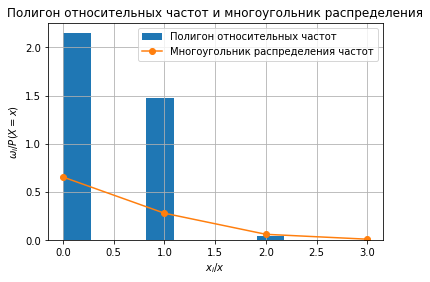

In [1381]:
k = int(1+np.floor(np.log2(data['BsmtFullBath'].count())))
data['BsmtFullBath'].hist(bins= k , density=True, label = "Полигон относительных частот")
plt.xlabel('$x_i/x$')
plt.ylabel("$\omega_i/P(X=x)$")
plt.title("Полигон относительных частот и многоугольник распределения")
plt.plot(xi, rv.pmf(xi), 'o-', label = "Многоугольник распределения частот")
plt.legend()

$H_0$: распределение параметра BsmtFullBath не отличается от распределения Пуассона с $a=0.4253$

$H_1$: распределение параметра BsmtFullBath отличается от распределения Пуассона с $a=0.4253$

In [1382]:
ni

array([856, 588,  15,   1])

In [1383]:
n_th = rv.pmf(xi)*n #теоритияеские частоты
n_th

array([954.17705736, 405.85202234,  86.31304996,  12.23753517])

In [1384]:
chi2_emp = sum((ni - n_th )**2/n_th)
chi2_emp

161.08943753172503

In [1385]:
a = 0.01
chi2_kr = sts.chi2.ppf(1-a, 5-2)
chi2_kr

11.344866730144373

$\chi^2_{набл} > \chi^2_{кр}$ следовательно не $H_0$ принимаем

Вывод: обнаружены статистически значимые различия между распределения генеральной совокупности и с распределенияем Пауссона  с $a=0.4253$

**Источники:**

https://matica.org.ua/metodichki-i-knigi-po-matematike/konspekt-lektcii-po-teorii-veroiatnostei-i-matematicheskoi-statistike-komogortcev-v-f/2-09-proverka-gipotezy-o-normalnosti-raspredeleniia-sluchainoi-velichiny-kriterii-pirsona?ysclid=le8qfl3pda554000

https://studfile.net/preview/6047446/page:8/

https://mathhelpplanet.com/static.php?p=kriterii-soglasiya

# Разведочный анализ данных(часть 2)
*Коптев Данил*

**Колличественные признаки:** LotFrontage, ScreenPorch, BsmtFullBath

**Качественные признаки:** HouseStyle,RoofMatl, ExterCond

**Задание 2**

**Справочная информация**

В случае, когда

• признаки измерены в неметрической (порядковой) шкале,

• либо данные содержат выбросы,

• либо распределение существенно отличается от нормального,

**мы используем ранговую корреляцию Спирмена и Кендалла**, в ином случае корреляцию Пирсона

**Вывод на основание 1 части**

*На основание иследований 1 части мы можем сформировать критерии где нужно применять ранговую корреляцию, а где корреляцию Пирсона.*

**LotFrontage** - отличается от нормального распределения, следовательно *используем ранговую корреляцию Спирмена и Кендалла*.

**ScreenPorch** - не отличается от нормального распределения, если у данного критерия устранить анамольное значение равное нулю, в ином случае, оно отлично от нормального распределения, поэтому для данного параметра будем *использовать ранговую корреляцию Спирмена и Кендалла для параметра с 0 значением, и корреляцию Пирсона для параметра без 0 значения*.

**BsmtFullBath** - отличается от нормального распределения, следовательно *используем ранговую корреляцию Спирмена и Кендалла*.

Но в  учебных  целях, мы применим  все  три  метода  корреляционного  анализа и  проанализируем полученные результаты

**Сформируем наши параметры**

In [1386]:
data = dataAll[['LotFrontage', 'ScreenPorch', 'BsmtFullBath', 'SalePrice']]
data['ScreenPorchNotNull'] = dataAll['ScreenPorch'][dataAll['ScreenPorch']!=0]

<ipython-input-1386-e1045f07fb87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ScreenPorchNotNull'] = dataAll['ScreenPorch'][dataAll['ScreenPorch']!=0]


**Метода  корреляционного  анализа для наших параметров**

Коэфиценты корреляции Пирсона

In [1387]:
data.corr('pearson')

,LotFrontage,ScreenPorch,BsmtFullBath,SalePrice,ScreenPorchNotNull
LotFrontage,1.000000,0.041383,0.100949,0.351799,0.118210
ScreenPorch,0.041383,1.000000,0.023148,0.111447,1.000000
BsmtFullBath,0.100949,0.023148,1.000000,0.227122,-0.020613
SalePrice,0.351799,0.111447,0.227122,1.000000,0.255430
ScreenPorchNotNull,0.118210,1.000000,-0.020613,0.255430,1.000000


Коэффициент корреляции Спирмена

In [1388]:
data.corr('spearman')

,LotFrontage,ScreenPorch,BsmtFullBath,SalePrice,ScreenPorchNotNull
LotFrontage,1.000000,0.043849,0.085990,0.409076,0.191875
ScreenPorch,0.043849,1.000000,0.030253,0.100070,1.000000
BsmtFullBath,0.085990,0.030253,1.000000,0.225125,0.028525
SalePrice,0.409076,0.100070,0.225125,1.000000,0.315402
ScreenPorchNotNull,0.191875,1.000000,0.028525,0.315402,1.000000


Коэффициент корреляции Кендалла

In [1389]:
data.corr('kendall')

,LotFrontage,ScreenPorch,BsmtFullBath,SalePrice,ScreenPorchNotNull
LotFrontage,1.000000,0.035484,0.070795,0.290361,0.134641
ScreenPorch,0.035484,1.000000,0.029492,0.080654,1.000000
BsmtFullBath,0.070795,0.029492,1.000000,0.183182,0.023438
SalePrice,0.290361,0.080654,0.183182,1.000000,0.214471
ScreenPorchNotNull,0.134641,1.000000,0.023438,0.214471,1.000000


**Справочная информация**

Коэффициент корреляции означает:

* если коэффициент корреляции близок к 1, то между переменными наблюдается положительная корреляция. Иными словами, отмечается высокая степень связи между переменными. В данном случае, если значения переменной x будут возрастать, то и выходная переменная также будет увеличиваться;

* если коэффициент корреляции близок к -1, это означает, что между переменными имеет место сильная отрицательная корреляци.Иными словами, поведение выходной переменной будет противоположным поведению входной. Если значение x будет возрастать, то y будет уменьшаться, и наоборот;

* промежуточные значения, близкие к 0, будут указывать на слабую корреляцию между переменными и, соответственно, низкую зависимость. Иными словами, поведение переменной x не будет совсем (или почти совсем) влиять на поведение y (и наоборот).

**Промежуточный вывод** 

**LotFrontage и параметры:**

* ScreenPorch - наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

* BsmtFullBath	- наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

* SalePrice	- наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0, но выше чем у других

* ScreenPorchNotNull - наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

**ScreenPorch и параметры:**

* LotFrontage - наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

* BsmtFullBath	- наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

* SalePrice	- наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

* ScreenPorchNotNull - наблюдается полная положительная корреляция, так как это одни и теже значения, но без нулевого значения

**BsmtFullBath и параметры:**

* LotFrontage - наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

* ScreenPorch	- наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

* SalePrice	- наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

* ScreenPorchNotNull - наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0 

**ScreenPorchNotNull и параметры:**

* LotFrontage - наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0. Можно заметить, что имеется существенное различие с коэффицентом кореляции данного параметра и ScreenPorch, поэтому можно сделать вывод, что значение 0 существенно влияет на коэфицент корреляции

* ScreenPorch	- наблюдается полная положительная корреляция, так как это одни и теже значения, но с нулевым значением

* SalePrice	- наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0. Можно заметить, что имеется существенное различие с коэффицентом кореляции данного параметра и ScreenPorch, поэтому можно сделать вывод, что значение 0 существенно влияет на коэфицент корреляции

* BsmtFullBath - наблюдается корреляция, так как коэфицент корреляции отличается от нуля, но она слабая, так как близко к 0. Отсутсвует существенное различие с коэффицентом кореляции данного параметра и ScreenPorch.

**Построим парные графики рассеяния**

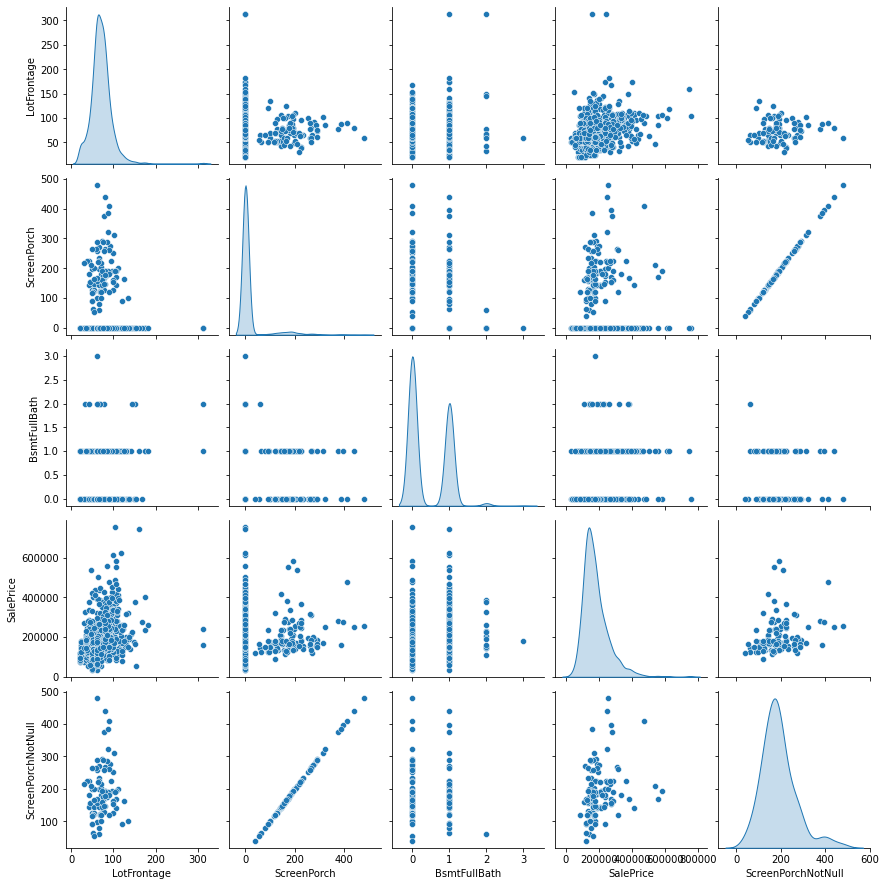

In [1390]:
sns.pairplot(data, diag_kind='kde', height = 2.5)

**Вывод** 

Графики подверждаю описанные ранее выводы

**Задание 3**

**Опишем качественные признаки**

**HouseStyle** - стиль дома 

**RoofMatl** - материал крыши

**ExterCond** - состояние материала снаружи

Выделим в отдельную переменную качественные признаки

In [1391]:
dataQualitative = dataAll[['HouseStyle','RoofMatl', 'ExterCond']]
dataQualitative

,HouseStyle,RoofMatl,ExterCond
0,2Story,CompShg,TA
1,1Story,CompShg,TA
2,2Story,CompShg,TA
3,2Story,CompShg,TA
4,2Story,CompShg,TA
...,...,...,...
1455,2Story,CompShg,TA
1456,1Story,CompShg,TA
1457,2Story,CompShg,Gd
1458,1Story,CompShg,TA


**Столбцовая диаграмма для параметра HouseStyle**

Text(0.5, 0, 'HouseStyle')

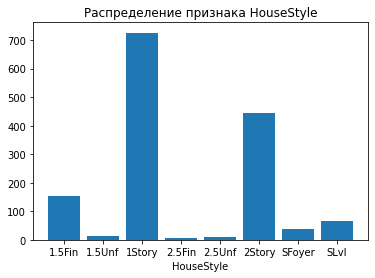

In [1392]:
xi, ni = np.unique(dataQualitative['HouseStyle'], return_counts = True)
plt.bar(xi, ni)
plt.title('Распределение признака HouseStyle')
plt.xlabel('HouseStyle')

**Вывод**

На графике видно, что у значений имеются определенно малые значения, поэтому мы можем уменьшить размерность путем объединения 1.5Unf и 2.5Unf в Unf, а так же 1.5Fin и 2.5Fin в Fin, а так же SFoyer в их объединение SLvl SFoyer&SLvl 

**Столбцовая диаграмма для параметра RoofMatl**

Text(0.5, 0, 'RoofMatl')

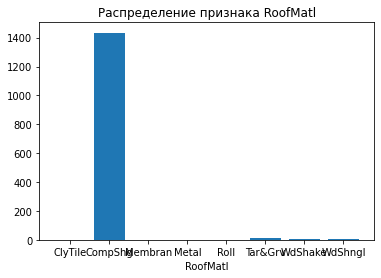

In [1393]:
xi, ni = np.unique(dataQualitative['RoofMatl'], return_counts = True)
plt.bar(xi, ni)
plt.title('Распределение признака RoofMatl')
plt.xlabel('RoofMatl')

**Вывод**

На графике видно, что значений CompShg многократно преобладает по сравнению других значений, поэтому есть смысл объединить все оставшиеся значения в один et al.

**Столбцовая диаграмма для параметра ExterCond**

Text(0.5, 0, 'ExterCond')

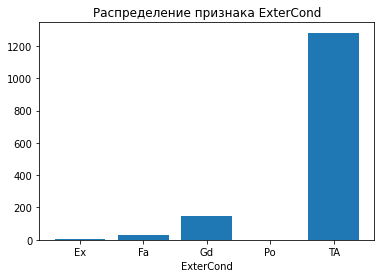

In [1394]:
xi, ni = np.unique(dataQualitative['ExterCond'], return_counts = True)
plt.bar(xi, ni)
plt.title('Распределение признака ExterCond')
plt.xlabel('ExterCond')

**Вывод**

На графике видно, что значению Po, Ex и Fa присуще малое значение, поэтому есть возможность объединения в значение Po,Ex&Fa

**Устраним малочисленные значения качественных параметров**

**Ps:** *Изначально объединения малочисленных не было, но без этого надежность $chi^2$ меньше $20$%, поэтому на основание ваших сообщений было предпринита попытка объединения данных*

In [1395]:
dataQualitative['ExterCond'] = dataAll['ExterCond'].replace(['Po', 'Ex', 'Fa'], 'Po,Ex&Fa')

dataQualitative['RoofMatl'] = dataQualitative['RoofMatl'].replace(['ClyTile' , 'Membran', 'Metal', 'Roll', 'WdShake', 'WdShngl', 'Tar&Grv'], 'et al.')

dataQualitative['HouseStyle'] = dataQualitative['HouseStyle'].replace(['1.5Unf', '2.5Unf'], 'Unf')
dataQualitative['HouseStyle'] = dataQualitative['HouseStyle'].replace(['1.5Fin', '2.5Fin'], 'Fin')
dataQualitative['HouseStyle'] = dataQualitative['HouseStyle'].replace(['SFoyer', 'SLvl'], 'SLvl&SFoyer')

<ipython-input-1395-44f716b566a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataQualitative['ExterCond'] = dataAll['ExterCond'].replace(['Po', 'Ex', 'Fa'], 'Po,Ex&Fa')
<ipython-input-1395-44f716b566a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataQualitative['RoofMatl'] = dataQualitative['RoofMatl'].replace(['ClyTile' , 'Membran', 'Metal', 'Roll', 'WdShake', 'WdShngl', 'Tar&Grv'], 'et al.')
<ipython-input-1395-44f716b566a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

**Задание 4**

**Справочная информация**

* Критерий $\chi^2$  считается надежным, только если в таблице сопряженности не слишком много клеток с небольшими частотами (количество клеток с частотами менее 5 не
должно превышать 20%).

* Критерий $\chi^2$  позволяет только проверить наличие
взаимосвязи между признаками, но не позволяет оценить силу и направленность связи.

**Построим таблицы сопряженности**

Таблица сопряженности **RoofMatl - ExterCond**

In [1396]:
crosstabRoofMatlExterCond = pd.crosstab(dataQualitative['RoofMatl'], dataQualitative['ExterCond'], margins = True)
print(crosstabRoofMatlExterCond)

ExterCond   Gd  Po,Ex&Fa    TA   All
RoofMatl                            
CompShg    140        32  1262  1434
et al.       6         0    20    26
All        146        32  1282  1460


Таблица сопряженности **RoofMatl - HouseStyle**

In [1397]:
crosstabRoofMatlHouseStyle = pd.crosstab(dataQualitative['RoofMatl'], dataQualitative['HouseStyle'], margins = True)
print(crosstabRoofMatlHouseStyle)

HouseStyle  1Story  2Story  Fin  SLvl&SFoyer  Unf   All
RoofMatl                                               
CompShg        713     439  161           96   25  1434
et al.          13       6    1            6    0    26
All            726     445  162          102   25  1460


Таблица сопряженности **ExterCond - HouseStyle**

In [1398]:
crosstabExterCondHouseStyle = pd.crosstab(dataQualitative['ExterCond'], dataQualitative['HouseStyle'], margins = True)
print(crosstabExterCondHouseStyle)

HouseStyle  1Story  2Story  Fin  SLvl&SFoyer  Unf   All
ExterCond                                              
Gd              67      33   27           17    2   146
Po,Ex&Fa        13       6   11            1    1    32
TA             646     406  124           84   22  1282
All            726     445  162          102   25  1460


**Проверим надежность $\chi^2$ для наших параметров**

Надежность $\chi^2$ для параметров **RoofMatl - ExterCond** достаточна, так как процент значений меньше 5 составляет $16.(6)$%

Надежность $\chi^2$ для параметров **RoofMatl - HouseStyle** достаточна, так как процент значений меньше 5 составляет $20$%

Надежность $\chi^2$ для параметров **`ExterCond - HouseStyle`** достаточна, так как процент значений меньше 5 составляет $20$%

**Следовательно, мы можем применить критерий $\chi^2$ и найти коэффициента  Крамера для наших параметров**

**Сформулируем гипотезы**

$H_0$: признаки X и Y не связаны между собой зависимостью

$H_1$: признаки X и Y являются связанными.

**Критерий $\chi^2$ для параметров RoofMatl - ExterCond**

In [1399]:
obs = np.array(crosstabRoofMatlExterCond.iloc[range(crosstabRoofMatlExterCond.shape[0]-1), [0, 1, 2]])
exp = np.dot(np.array(crosstabRoofMatlExterCond.iloc[range(crosstabRoofMatlExterCond.shape[0]-1), [3]]), np.array(crosstabRoofMatlExterCond.iloc[[crosstabRoofMatlExterCond.shape[0]-1], [0, 1, 2]]))
exp = exp/crosstabRoofMatlExterCond.iloc[[crosstabRoofMatlExterCond.shape [0]-1], [3]].values[0][0]
print("Наблюдаемые частоты In", obs) 
print("Объем выборки", crosstabRoofMatlExterCond.iloc[[crosstabRoofMatlExterCond.shape[0]-1], [3]].values[0][0]) 
print("Теоретические частоты In", exp)
ddof =obs.shape[0]+obs.shape[1]-2
print(ddof)
chisquareRM_EC = sts.chisquare(obs, exp, ddof, None)
print(chisquareRM_EC)

Наблюдаемые частоты In [[ 140   32 1262]
 [   6    0   20]]
Объем выборки 1460
Теоретические частоты In [[1.43400000e+02 3.14301370e+01 1.25916986e+03]
 [2.60000000e+00 5.69863014e-01 2.28301370e+01]]
3
Power_divergenceResult(statistic=5.464161662700817, pvalue=0.06508372042281892)


$p-value = 0.065$ больше $0.05$, следовательно нет оснований отвергнуть гипотезу о независимости признаков

**Критерий $\chi^2$ для параметров RoofMatl - HouseStyle**

In [1400]:
obs = np.array(crosstabRoofMatlHouseStyle.iloc[range(crosstabRoofMatlHouseStyle.shape[0]-1), [0, 1, 2, 3, 4]])
exp = np.dot(np.array(crosstabRoofMatlHouseStyle.iloc[range(crosstabRoofMatlHouseStyle.shape[0]-1), [5]]), np.array(crosstabRoofMatlHouseStyle.iloc[[crosstabRoofMatlHouseStyle.shape[0]-1], [0, 1, 2, 3, 4]]))
exp = exp/crosstabRoofMatlHouseStyle.iloc[[crosstabRoofMatlHouseStyle.shape [0]-1], [5]].values[0][0]
print("Наблюдаемые частоты In", obs) 
print("Объем выборки", crosstabRoofMatlHouseStyle.iloc[[crosstabRoofMatlHouseStyle.shape[0]-1], [5]].values[0][0]) 
print("Теоретические частоты In", exp)
ddof =obs.shape[0]+obs.shape[1]-2
print(ddof)
chisquareRM_HS = sts.chisquare(obs, exp, ddof, None)
print(chisquareRM_HS)

Наблюдаемые частоты In [[713 439 161  96  25]
 [ 13   6   1   6   0]]
Объем выборки 1460
Теоретические частоты In [[7.13071233e+02 4.37075342e+02 1.59115068e+02 1.00183562e+02
  2.45547945e+01]
 [1.29287671e+01 7.92465753e+00 2.88493151e+00 1.81643836e+00
  4.45205479e-01]]
5
Power_divergenceResult(statistic=11.993626742611028, pvalue=0.01739872139390302)


$p-value = 0.017$ меньше $0.05$, следовательно существуют основания отвергнуть  гипотезу о независимости признаков

**Критерий $\chi^2$ для параметров ExterCond - HouseStyle**

In [1401]:
obs = np.array(crosstabExterCondHouseStyle.iloc[range(crosstabExterCondHouseStyle.shape[0]-1), [0, 1, 2, 3, 4]])
exp = np.dot(np.array(crosstabExterCondHouseStyle.iloc[range(crosstabExterCondHouseStyle.shape[0]-1), [5]]), np.array(crosstabExterCondHouseStyle.iloc[[crosstabExterCondHouseStyle.shape[0]-1], [0, 1, 2, 3, 4]]))
exp = exp/crosstabExterCondHouseStyle.iloc[[crosstabExterCondHouseStyle.shape [0]-1], [5]].values[0][0]
print("Наблюдаемые частоты In", obs) 
print("Объем выборки", crosstabExterCondHouseStyle.iloc[[crosstabExterCondHouseStyle.shape[0]-1], [5]].values[0][0]) 
print("Теоретические частоты In", exp)
ddof =obs.shape[0]+obs.shape[1]-2
print(ddof)
chisquareEC_HS = sts.chisquare(obs, exp, ddof, None)
print(chisquareRM_HS)

Наблюдаемые частоты In [[ 67  33  27  17   2]
 [ 13   6  11   1   1]
 [646 406 124  84  22]]
Объем выборки 1460
Теоретические частоты In [[7.26000000e+01 4.45000000e+01 1.62000000e+01 1.02000000e+01
  2.50000000e+00]
 [1.59123288e+01 9.75342466e+00 3.55068493e+00 2.23561644e+00
  5.47945205e-01]
 [6.37487671e+02 3.90746575e+02 1.42249315e+02 8.95643836e+01
  2.19520548e+01]]
6
Power_divergenceResult(statistic=11.993626742611028, pvalue=0.01739872139390302)


$p-value = 0.017$ меньше $0.05$, следовательно существуют основания отвергнуть  гипотезу о независимости признаков

**Вычислим  значения  коэффициента  Крамера для параметров, которые опровергли нулевую гипотезу**

**Справочная информация**

Чем выше $V$, тем сильнее взаимосвязь между переменными.

Значения больше $0,30$ считаются существенными

Верхний предел $V=1$

In [1402]:
def calculateCramers(data):
  global sts, np
  chi2 = sts.chi2_contingency (data, correction= False )[0]
  n = np.sum(data)
  minDim = min(data.shape) - 1
  return np.sqrt((chi2/n) / minDim)

print('Коэффициента  Крамера для параметров ExterCond - HouseStyle: ', calculateCramers(np.array(crosstabExterCondHouseStyle.iloc[range(crosstabExterCondHouseStyle.shape[0]-1), [0, 1, 2, 3, 4]])))
print('Коэффициента  Крамера для параметров RoofMatl - HouseStyle: ', calculateCramers(np.array(crosstabRoofMatlHouseStyle.iloc[range(crosstabRoofMatlHouseStyle.shape[0]-1), [0, 1, 2, 3, 4]])))

Коэффициента  Крамера для параметров ExterCond - HouseStyle:  0.11301484480477905
Коэффициента  Крамера для параметров RoofMatl - HouseStyle:  0.0906356046893538


Коэффициента  Крамера $V$ для ExterCond - HouseStyle равен $0.1130$, следовательно взаимосвязь параметров крайне мала

Коэффициента  Крамера $V$ для RoofMatl - HouseStyle равен $0.0906$, следовательно взаимосвязь параметров крайне мала

**Задание 5**



**Выполним  визуализацию  в  виде  диаграмм  «ящик  с  усами»**

In [1403]:
dataQ_SP = dataAll[['HouseStyle','RoofMatl', 'ExterCond', 'SalePrice']]

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

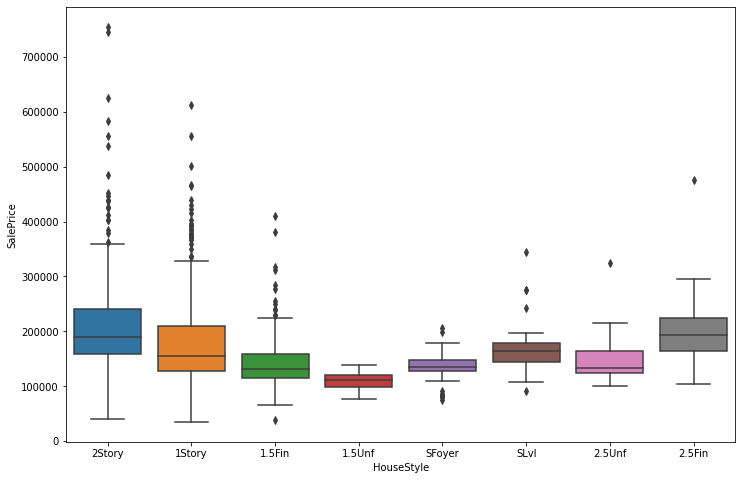

In [1404]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='HouseStyle', y="SalePrice", data=dataQ_SP)


На основание диаграммы нельзя судь о возможной пониженности размерности

2Story, 1Story, 1.5Fin наблюдается большое колличество выбросов, у значений SFoyer, SLvl, 2.5Unf и 2.5Fin наблюдаются незначительные выбросы.

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

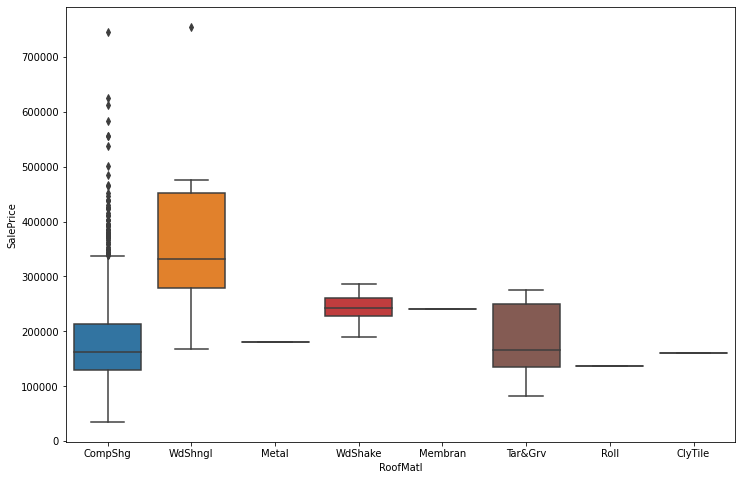

In [1405]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='RoofMatl', y="SalePrice", data=dataQ_SP)


На основание диаграммы можно судить о возможной пониженности размерности, например объединения WdChake и Membran, так как их медиана находится на одном уровне, а так же по аналогии CryTile и CompShg

У CompShg наблюдается большое колличество выбросов, у значения WdShngl наблюдаются незначительные колличество выбросов.

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

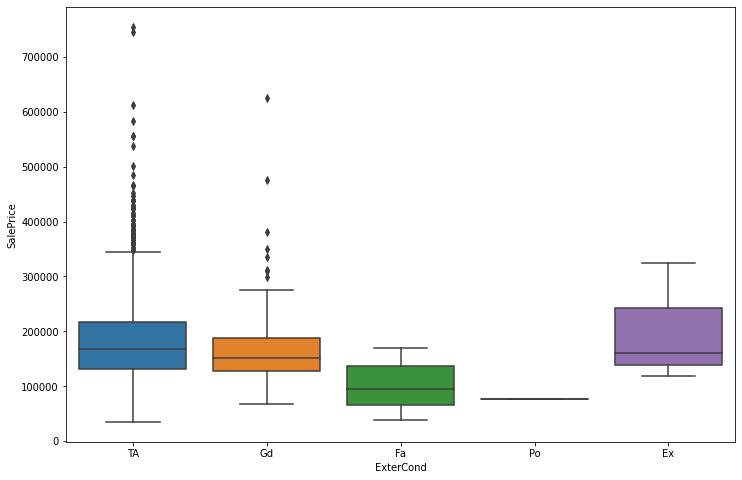

In [1406]:

plt.subplots(figsize=(12, 8))
sns.boxplot(x='ExterCond', y="SalePrice", data=dataQ_SP)

На основание диаграммы можно судить о возможной пониженности размерности, например объединения Fa и Po, так как их медиана находится примерно на одном уровне

У TA наблюдается большое колличество выбросов, у значения Gd наблюдаются незначительные колличество выбросов.